# Advanced Analysis 

This Notebook will contain Advanced analysis techniques and results.

### Step 1 Correlation validation of experience to salary

Tables in database:
                 name
0  salary_data_clean
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
Pearson Correlation (Experience ↔ Salary): 0.809
P-value: 0.00000


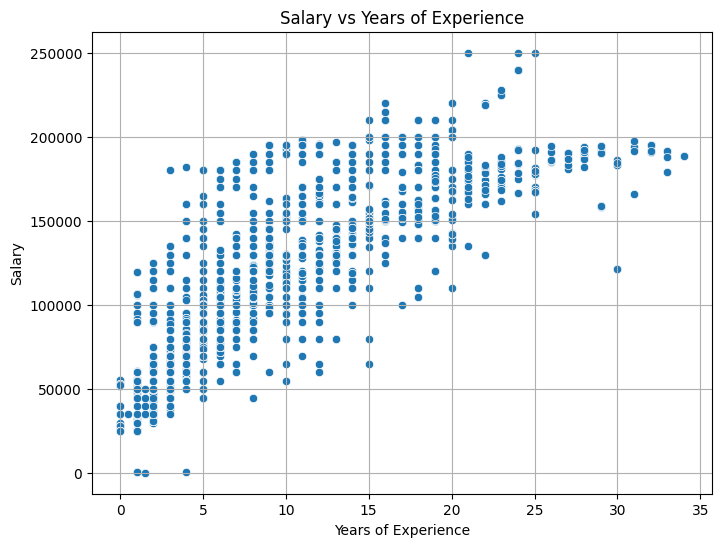

Trend Line Equation: Salary = 7046.73 * Experience + 58284.69


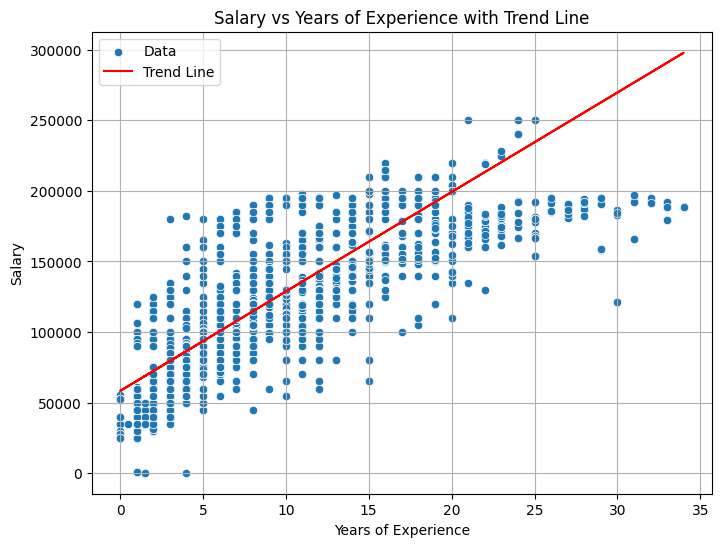

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# -----------------------------
# 1. Connect to the database
# -----------------------------
db_path = "../data/salary_data_clean.db"
conn = sqlite3.connect(db_path)

# -----------------------------
# 2. List tables (to confirm table name)
# -----------------------------
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in database:\n", tables)

# -----------------------------
# 3. Load the salary data table
# -----------------------------
# Replace 'salary_data_clean' below with the actual table name if different
table_name = 'salary_data_clean'  
df = pd.read_sql(f"SELECT * FROM {table_name};", conn)

conn.close()

# Show the first few rows to verify data loaded correctly
print(df.head())

# -----------------------------
# 4. Step 1.1 - Calculate Pearson Correlation
# -----------------------------
experience = df['Years of Experience']
salary = df['Salary']

corr, p_value = pearsonr(experience, salary)
print(f"Pearson Correlation (Experience ↔ Salary): {corr:.3f}")
print(f"P-value: {p_value:.5f}")

# -----------------------------
# 5. Step 1.2 - Scatter Plot
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=experience, y=salary)
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

# -----------------------------
# 6. Step 1.3 - Trend Line (Simple Linear Regression)
# -----------------------------
coefficients = np.polyfit(experience, salary, 1)  # Linear fit
slope, intercept = coefficients
print(f"Trend Line Equation: Salary = {slope:.2f} * Experience + {intercept:.2f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=experience, y=salary, label="Data")
plt.plot(experience, slope * experience + intercept, color='red', label="Trend Line")
plt.title("Salary vs Years of Experience with Trend Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

### Step 2 Analyze Correlations within Specifc Job Title

                    Job Title  Count  Correlation  P-value         Slope
0     Human Resources Manager    104     0.998186  < 0.001   8878.306878
1          Software Developer    125     0.959579  < 0.001   6806.250000
2           Financial Manager    134     0.959566  < 0.001  11288.546436
3           Marketing Analyst    132     0.948091  < 0.001   9490.504390
4          Operations Manager    114     0.944437  < 0.001   6937.359478
5         Front end Developer    241     0.923766  < 0.001   6845.722501
6           Marketing Manager    255     0.918852  < 0.001   8082.746732
7       Marketing Coordinator    158     0.887820  < 0.001   7125.206340
8             Product Manager    313     0.858080  < 0.001   9887.227397
9         Full Stack Engineer    308     0.849997  < 0.001   3951.279516
10         Back end Developer    244     0.833710  < 0.001   5429.385189
11          Software Engineer    518     0.795951  < 0.001  17227.009187
12     Junior Sales Associate    142     0.765883  

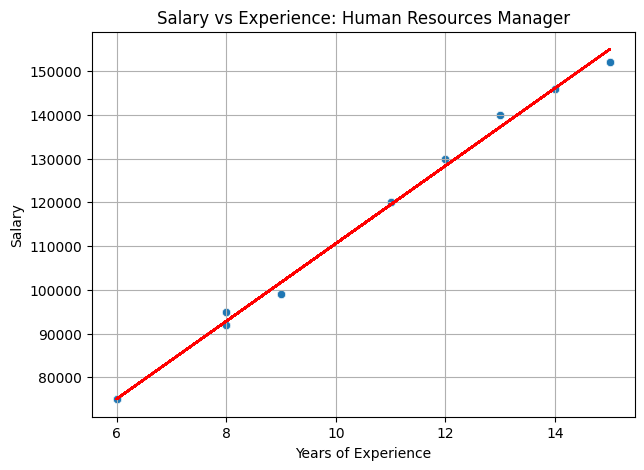

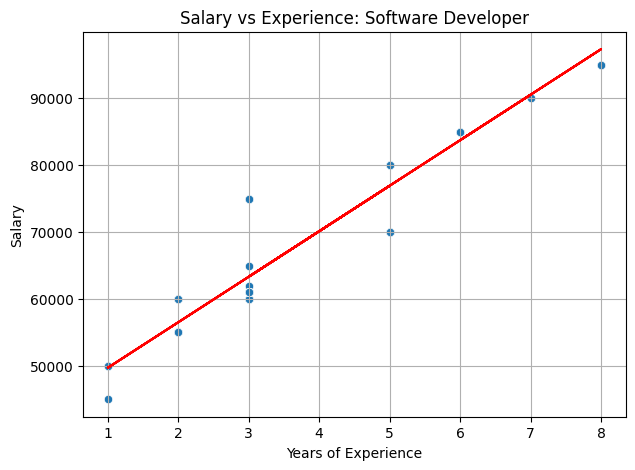

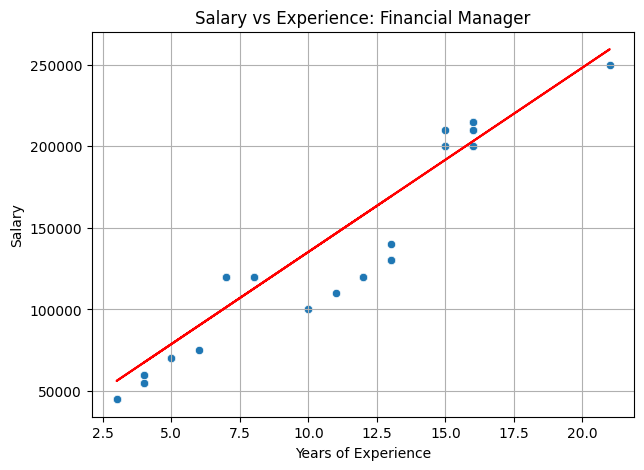

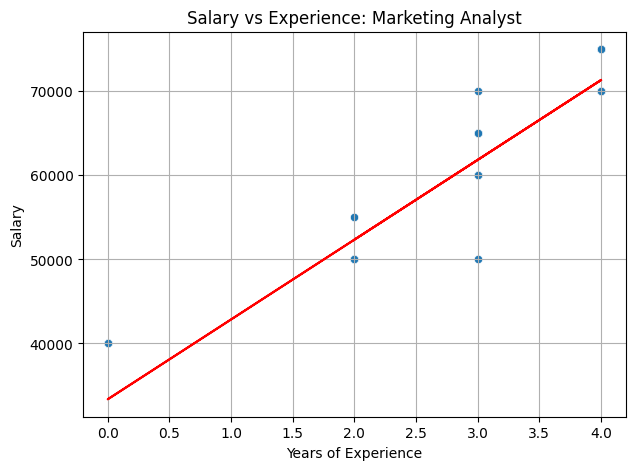

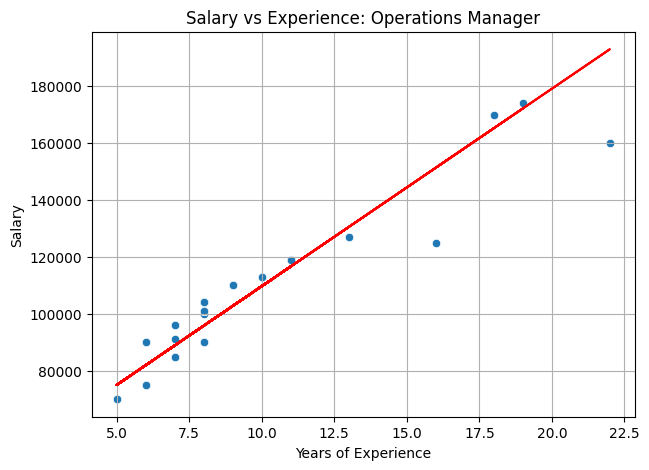

In [7]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# 1. Count entries per Job Title
# -----------------------------
job_counts = df['Job Title'].value_counts()
titles_to_analyze = job_counts[job_counts > 100].index
df_filtered = df[df['Job Title'].isin(titles_to_analyze)]

# -----------------------------
# P-value formatting function
# -----------------------------
def format_p(p):
    if p < 0.001:
        return "< 0.001"
    else:
        return f"{p:.3f}"

# -----------------------------
# 2. Compute correlations
# -----------------------------
summary_list = []

for title, group in df_filtered.groupby('Job Title'):
    experience = group['Years of Experience']
    salary = group['Salary']
    
    if len(group) > 1:
        corr, p_value = pearsonr(experience, salary)
        slope = (salary.corr(experience) * salary.std()) / experience.std()
        
        summary_list.append({
            'Job Title': title,
            'Count': len(group),
            'Correlation': corr,
            'P-value': format_p(p_value),
            'Slope': slope
        })

summary_df = pd.DataFrame(summary_list)
summary_df = summary_df.sort_values(by='Correlation', ascending=False)
summary_df.reset_index(drop=True, inplace=True)

# -----------------------------
# 3. Show summary table
# -----------------------------
print(summary_df)

# -----------------------------
# 4. Optional: scatterplots
# -----------------------------
top_titles = summary_df.head(5)['Job Title']

for title in top_titles:
    group = df_filtered[df_filtered['Job Title'] == title]
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=group['Years of Experience'], y=group['Salary'])
    slope, intercept = np.polyfit(group['Years of Experience'], group['Salary'], 1)
    plt.plot(group['Years of Experience'], slope*group['Years of Experience'] + intercept, color='red')
    plt.title(f"Salary vs Experience: {title}")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.grid(True)
    plt.show()

### Step 3 Regression anaysis

#### Overall Regression Salary and Experience

/var/folders/vt/1glhq4pd72s2pq4r1wl_lx840000gn/T/ipykernel_26641/3445915139.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df['Years of Experience'], model.params[0] + model.params[1]*df['Years of Experience'],


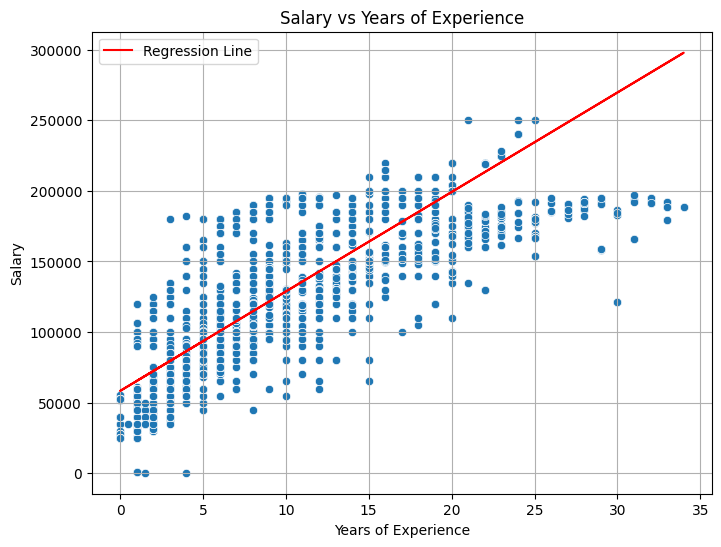

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Wed, 19 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:17:47   Log-Likelihood:                -78780.
No. Observations:                6698   AIC:                         1.576e+05
Df Residuals:                    6696   BIC:                         1.576e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.828e+04    632.785     92.108      0.000     5.7e+04    5.95e+04
Years of Experience  7046.7345     62.577    112.608      0.000    6924.063    7169.406
==============================================================================
Omnibus:                      223.085   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.654
Skew:                           0.432   Prob(JB):                     2.26e-55
Kurtosis:                       3.392   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Prepare variables
# -----------------------------
X = sm.add_constant(df['Years of Experience'])  # Add intercept
y = df['Salary']

# -----------------------------
# Fit regression model
# -----------------------------
model = sm.OLS(y, X).fit()

# -----------------------------
# Scatter plot with regression line
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'])
plt.plot(df['Years of Experience'], model.params[0] + model.params[1]*df['Years of Experience'],
         color='red', label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.legend()
plt.grid(True)
plt.show()

model.summary()

#### Regression using Salary and Experience based on Job Title

--- Software Engineer ---
Slope: 17227.01, Intercept: 36586.38, R²: 0.634, N: 518

--- Data Scientist ---
Slope: 2508.12, Intercept: 138156.71, R²: 0.238, N: 453

--- Software Engineer Manager ---
Slope: 3029.29, Intercept: 123856.26, R²: 0.444, N: 376

--- Data Analyst ---
Slope: 6007.18, Intercept: 95237.05, R²: 0.418, N: 363

--- Senior Project Engineer ---
Slope: 4378.01, Intercept: 103376.97, R²: 0.506, N: 318

--- Product Manager ---
Slope: 9887.23, Intercept: 65431.48, R²: 0.736, N: 313

--- Full Stack Engineer ---
Slope: 3951.28, Intercept: 91248.13, R²: 0.722, N: 308

--- Marketing Manager ---
Slope: 8082.75, Intercept: 40743.13, R²: 0.844, N: 255

--- Senior Software Engineer ---
Slope: 3150.37, Intercept: 107260.25, R²: 0.574, N: 244

--- Back end Developer ---
Slope: 5429.39, Intercept: 69420.23, R²: 0.695, N: 244

--- Front end Developer ---
Slope: 6845.72, Intercept: 56269.83, R²: 0.853, N: 241

--- Marketing Coordinator ---
Slope: 7125.21, Intercept: 39658.61, R²: 0.788,

,Job Title,Slope,Intercept,R-squared,N
0,Software Engineer,17227.009187,36586.378039,0.633538,518
13,Financial Manager,11288.546436,22339.648934,0.920767,134
5,Product Manager,9887.227397,65431.477248,0.736302,313
14,Marketing Analyst,9490.504390,33366.687087,0.898876,132
17,Human Resources Manager,8878.306878,21804.232804,0.996375,104
7,Marketing Manager,8082.746732,40743.127957,0.844290,255
11,Marketing Coordinator,7125.206340,39658.611264,0.788224,158
16,Operations Manager,6937.359478,40318.012606,0.891961,114
10,Front end Developer,6845.722501,56269.831944,0.853344,241
15,Software Developer,6806.250000,42900.000000,0.920792,125


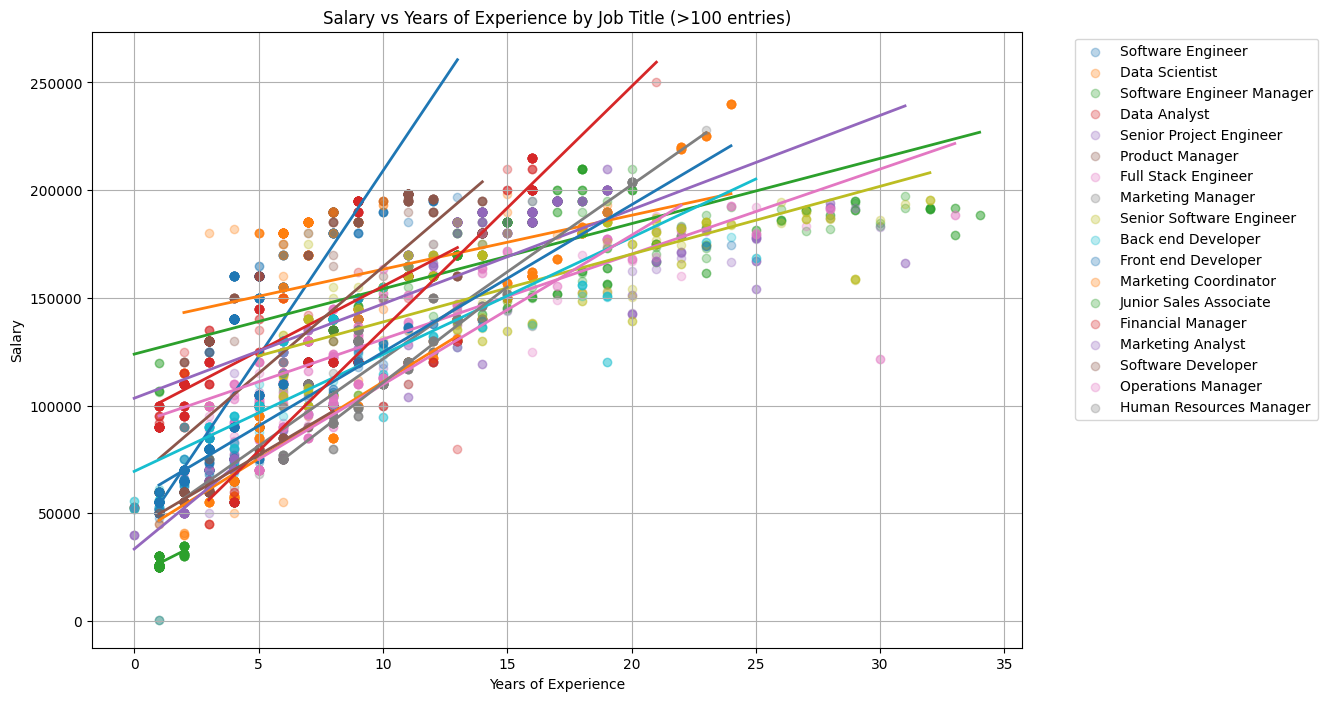

In [4]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Filter job titles with >100 entries
# -----------------------------
title_counts = df['Job Title'].value_counts()
valid_titles = title_counts[title_counts > 100].index

# -----------------------------
# 2. Run regression for each valid job title (concise output)
# -----------------------------
results = {}
summary_list = []

for title in valid_titles:
    subset = df[df['Job Title'] == title]
    
    X = sm.add_constant(subset['Years of Experience'])
    y = subset['Salary']
    
    model = sm.OLS(y, X).fit()
    
    results[title] = model
    
    # Concise summary
    slope = model.params['Years of Experience']
    intercept = model.params['const']
    r2 = model.rsquared
    n = len(subset)
    
    summary_list.append({
        'Job Title': title,
        'Slope': slope,
        'Intercept': intercept,
        'R-squared': r2,
        'N': n
    })
    
    # Print concise results
    print(f"--- {title} ---")
    print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}, R²: {r2:.3f}, N: {n}\n")

# -----------------------------
# 3. Create summary dataframe for easy viewing and sorting
# -----------------------------
summary_df = pd.DataFrame(summary_list)
summary_df = summary_df.sort_values(by='Slope', ascending=False)
display(summary_df)

# -----------------------------
# 4. Plot scatter with regression lines per job title (unchanged)
# -----------------------------
plt.figure(figsize=(12,8))
colors = sns.color_palette('tab10', n_colors=len(valid_titles))

for i, title in enumerate(valid_titles):
    subset = df[df['Job Title'] == title]
    model = results[title]
    
    # Scatter points
    plt.scatter(subset['Years of Experience'], subset['Salary'], label=title, alpha=0.3, color=colors[i % len(colors)])
    
    # Regression line
    x_vals = pd.Series([subset['Years of Experience'].min(), subset['Years of Experience'].max()])
    y_vals = model.params['const'] + model.params['Years of Experience'] * x_vals
    plt.plot(x_vals, y_vals, color=colors[i % len(colors)], lw=2)

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience by Job Title (>100 entries)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Machine Learning

#### Random Forest and Gradient Boosting Regressor

In [5]:
# -----------------------------
# ML prediction of Salary
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
X = df[['Years of Experience', 'Job Title']]
y = df['Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the categorical 'Job Title'
preprocessor = ColumnTransformer(
    transformers=[
        ('job', OneHotEncoder(handle_unknown='ignore'), ['Job Title'])
    ],
    remainder='passthrough'  # keep Years of Experience as is
)

# Create pipelines for Random Forest and Gradient Boosting
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

gb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=200, random_state=42))
])

# Train models
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)

# Predict and evaluate
for name, model in [('Random Forest', rf_pipeline), ('Gradient Boosting', gb_pipeline)]:
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.3f}")

Random Forest: RMSE = 12770.32, R² = 0.943
Gradient Boosting: RMSE = 16227.78, R² = 0.908


#### Machine Learning Visualization

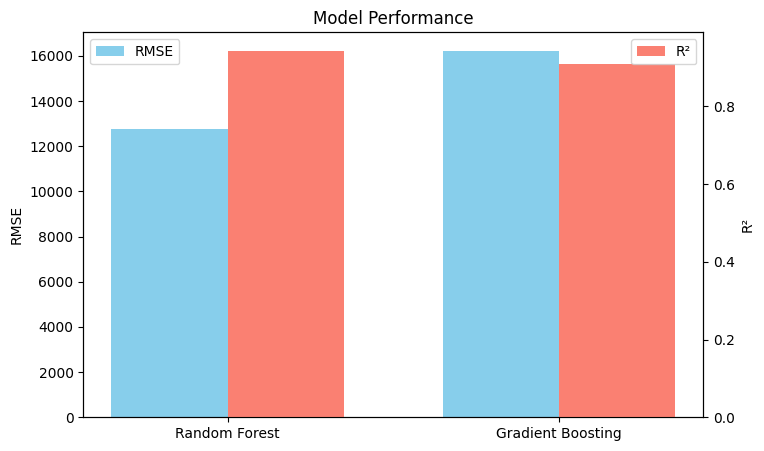

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Example results from your models
models = ['Random Forest', 'Gradient Boosting']
rmse_values = [12770.32, 16227.78]  # Replace with actual RMSE
r2_values = [0.943, 0.908]          # Replace with actual R²

x = np.arange(len(models))
width = 0.35  # width of the bars

fig, ax1 = plt.subplots(figsize=(8,5))

# Plot RMSE
ax1.bar(x - width/2, rmse_values, width, color='skyblue', label='RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_title('Model Performance')

# Create a second y-axis for R²
ax2 = ax1.twinx()
ax2.bar(x + width/2, r2_values, width, color='salmon', label='R²')
ax2.set_ylabel('R²')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()